In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

# Data preprocessing

In [2]:
tc = pd.read_csv("./updated_tc_Regression.csv")
tc.info()
tc.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4841 entries, 0 to 4840
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   kind           4841 non-null   object 
 1   area           4841 non-null   object 
 2   space          4841 non-null   float64
 3   floor          4841 non-null   int64  
 4   cat_floor      4841 non-null   object 
 5   top_floor      4841 non-null   int64  
 6   cat_top_floor  4841 non-null   object 
 7   mrt            4841 non-null   int64  
 8   bd             4841 non-null   int64  
 9   pet            4841 non-null   int64  
 10  elevator       4841 non-null   int64  
 11  parking        4841 non-null   int64  
 12  balcony        4841 non-null   int64  
 13  price          4841 non-null   int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 529.6+ KB


,kind,area,space,floor,cat_floor,top_floor,cat_top_floor,mrt,bd,pet,elevator,parking,balcony,price
0,整層住家,北屯區,28.0,2,1~5 樓,15,11~15 樓,0,1,0,1,0,0,29000
1,獨立套房,北屯區,12.6,6,6~10 樓,7,6~10 樓,0,1,0,1,0,0,8699
2,獨立套房,北屯區,13.0,6,6~10 樓,7,6~10 樓,0,1,0,1,0,0,11000
3,獨立套房,北屯區,13.0,2,1~5 樓,7,6~10 樓,0,1,0,1,0,0,11000
4,獨立套房,北區,13.0,12,11~15 樓,12,11~15 樓,0,0,0,1,0,0,11000


In [3]:
# tc['price'] = tc['price']/1000

In [4]:
tc.dtypes

kind              object
area              object
space            float64
floor              int64
cat_floor         object
top_floor          int64
cat_top_floor     object
mrt                int64
bd                 int64
pet                int64
elevator           int64
parking            int64
balcony            int64
price              int64
dtype: object

## Frequency encoding

In [5]:
tc.area

0       北屯區
1       北屯區
2       北屯區
3       北屯區
4        北區
       ... 
4836     北區
4837    北屯區
4838     西區
4839     北區
4840    西屯區
Name: area, Length: 4841, dtype: object

In [6]:
area_freq = tc.area.value_counts(normalize = True).to_dict()
area_freq

{'西屯區': 0.2171039041520347,
 '北屯區': 0.1658748192522206,
 '北區': 0.15595951249741788,
 '西區': 0.0712662673001446,
 '南屯區': 0.06630861392274323,
 '南區': 0.05618673827721545,
 '東區': 0.03945465812848585,
 '太平區': 0.03656269365833505,
 '烏日區': 0.02995248915513324,
 '龍井區': 0.028713075810782897,
 '大里區': 0.027473662466432555,
 '豐原區': 0.019004337946705228,
 '沙鹿區': 0.017971493493079943,
 '中區': 0.01693864903945466,
 '大雅區': 0.015286097913654203,
 '潭子區': 0.011567857880603181,
 '清水區': 0.009915306754802726,
 '霧峰區': 0.007229911175376988,
 '后里區': 0.007229911175376988}

In [7]:
tc['area_freq'] = tc.area.map(area_freq)
tc.head(8)

,kind,area,space,floor,cat_floor,top_floor,cat_top_floor,mrt,bd,pet,elevator,parking,balcony,price,area_freq
0,整層住家,北屯區,28.0,2,1~5 樓,15,11~15 樓,0,1,0,1,0,0,29000,0.165875
1,獨立套房,北屯區,12.6,6,6~10 樓,7,6~10 樓,0,1,0,1,0,0,8699,0.165875
2,獨立套房,北屯區,13.0,6,6~10 樓,7,6~10 樓,0,1,0,1,0,0,11000,0.165875
3,獨立套房,北屯區,13.0,2,1~5 樓,7,6~10 樓,0,1,0,1,0,0,11000,0.165875
4,獨立套房,北區,13.0,12,11~15 樓,12,11~15 樓,0,0,0,1,0,0,11000,0.155960
5,獨立套房,西屯區,7.3,6,6~10 樓,6,6~10 樓,1,0,0,1,0,0,7300,0.217104
6,獨立套房,西屯區,13.3,3,1~5 樓,5,1~5 樓,0,1,0,1,0,0,8999,0.217104
7,獨立套房,霧峰區,18.7,3,1~5 樓,5,1~5 樓,0,1,0,1,0,0,8998,0.007230


## One-hot encoding

In [8]:
on_hot_encode_kind = pd.get_dummies(tc['kind'], prefix='kind')
on_hot_encode_kind

,kind_分租套房,kind_整層住家,kind_獨立套房
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
4836,0,0,1
4837,0,1,0
4838,0,0,1
4839,0,0,1


In [9]:
tc = pd.concat([tc, on_hot_encode_kind], axis = 1)

tc_reset_colums= ['kind'
               , 'kind_分租套房'
               , 'kind_整層住家'
               , 'kind_獨立套房' 
               , 'area'
               , 'area_freq'
               , 'space'
               , 'floor'
               ,'cat_floor'
               , 'top_floor'
               , 'cat_top_floor'
               , 'mrt'
               , 'bd'
               , 'pet'
               , 'elevator'
               , 'parking'
               , 'balcony'
               , 'price'
               ]

tc = tc[tc_reset_colums]
tc.rename(columns={'kind_分租套房': 'kind_sublet'
                   , 'kind_整層住家': 'kind_whole_floor'
                   , 'kind_獨立套房':'kind_independent'}
          , inplace=True)

## Create X and y

In [10]:
tc.iloc[[1744],:]

,kind,kind_sublet,kind_whole_floor,kind_independent,area,area_freq,space,floor,cat_floor,top_floor,cat_top_floor,mrt,bd,pet,elevator,parking,balcony,price
1744,整層住家,0,1,0,北屯區,0.165875,28.0,12,11~15 樓,14,11~15 樓,0,1,0,1,0,0,22999


In [11]:
X = tc.drop(['cat_floor','cat_top_floor', 'price', 'kind', 'area', 'top_floor'], axis = 1)
y = tc['price']
X.columns

Index(['kind_sublet', 'kind_whole_floor', 'kind_independent', 'area_freq',
       'space', 'floor', 'mrt', 'bd', 'pet', 'elevator', 'parking', 'balcony'],
      dtype='object')

# Decision Tree Regression

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import numpy as np

## Bulid decision tree (split with MSE)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [14]:
dtr = DecisionTreeRegressor(random_state = 100
                            , criterion = 'squared_error'
                           ).fit(X_train, y_train)

real_y_test = y_test.to_numpy()
pred_y_test = dtr.predict(X_test)

# print(real_y_test)
# print(pred_y_test)

print('training R squared :', dtr.score(X_test, y_test))
print('testing R squared :', dtr.score(X_train, y_train))


training R squared : 0.6658057439807048
testing R squared : 0.9141571860358944


In [15]:
importance = list(zip(dtr.feature_importances_, X.columns))
sorted(importance)

[(0.00013473719515322069, 'kind_sublet'),
 (0.0002573621104879609, 'kind_independent'),
 (0.000844926717956021, 'balcony'),
 (0.006506387794949951, 'pet'),
 (0.007603271254435929, 'bd'),
 (0.010295930528897976, 'parking'),
 (0.013833857722196584, 'elevator'),
 (0.014211588577109312, 'mrt'),
 (0.064081740011026, 'floor'),
 (0.07670423876319077, 'area_freq'),
 (0.3756641982119519, 'space'),
 (0.4298617611126443, 'kind_whole_floor')]

In [16]:
# text_representation = tree.export_text(dtr, feature_names = X.columns.tolist())
# print(text_representation)

## Decision tree pruning with CCP (split with MSE)

In [17]:
from sklearn.model_selection import cross_val_score
import time 

In [18]:
dtr = DecisionTreeRegressor(random_state = 100
                            , criterion = 'squared_error'
                           ).fit(X_train, y_train)


model_prune = dtr.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = model_prune['ccp_alphas']
impurities = model_prune['impurities']

pd.DataFrame(model_prune).T

,0,1,2,3,4,5,6,7,8,9,...,2278,2279,2280,2281,2282,2283,2284,2285,2286,2287
ccp_alphas,0.000000e+00,0.000000e+00,0.000000e+00,3.865352e-12,1.455192e-11,1.546141e-11,1.291326e-05,4.304397e-05,4.304401e-05,4.304407e-05,...,1.058121e+06,1.128905e+06,1.263963e+06,1.946330e+06,2.606383e+06,4.506460e+06,4.631589e+06,8.225819e+06,4.179670e+07,7.513520e+07
impurities,1.641337e+07,1.641337e+07,1.641337e+07,1.641337e+07,1.641337e+07,1.641337e+07,1.641337e+07,1.641337e+07,1.641337e+07,1.641337e+07,...,4.883234e+07,5.109015e+07,5.235411e+07,5.430044e+07,5.690682e+07,6.141328e+07,6.604487e+07,7.427069e+07,1.160674e+08,1.912026e+08


In [19]:
len(ccp_alphas)

2288

### CV to choose best ccp_alpha (evaluate with R squared)

In [20]:
ccp_train_r2s = []
ccp_test_r2s = []
start = time.time()

for i in ccp_alphas:
    
    dtr_prune = DecisionTreeRegressor(criterion='squared_error'
                                      , ccp_alpha= i)
    
    ccp_test_r2 = cross_val_score(dtr_prune, X, y, cv=5, scoring="r2", n_jobs = 4).mean()
    
    dtr_prune.fit(X_train,y_train)
    ccp_train_r2 = dtr_prune.score(X_train,y_train)
    
    ccp_train_r2s.append(ccp_train_r2)
    ccp_test_r2s.append(ccp_test_r2)

end = time.time()
print('The calculation cost: ',end - start, 'sec')

The calculation cost:  129.14093685150146 sec


In [21]:
sorted(ccp_test_r2s, reverse = True)[0:10]

[0.6905056190876457,
 0.6897285332599814,
 0.6847330340316574,
 0.671569792775968,
 0.671569792775968,
 0.6591437028227727,
 0.6575517094518638,
 0.6572279972114119,
 0.6567954790609416,
 0.6564674736538377]

In [22]:
# aplha = [, ) is the best
top_3_r2 = sorted([* zip(ccp_alphas, ccp_test_r2s, ccp_train_r2s)], key=lambda a: a[1], reverse = True)[0:3]
top_3_r2

[(1263962.6280006208, 0.6905056190876457, 0.7261851493602425),
 (1946330.0617188038, 0.6897285332599814, 0.7160057367534137),
 (2606383.347107075, 0.6847330340316574, 0.7023742093862929)]

### Visualize pruned tree

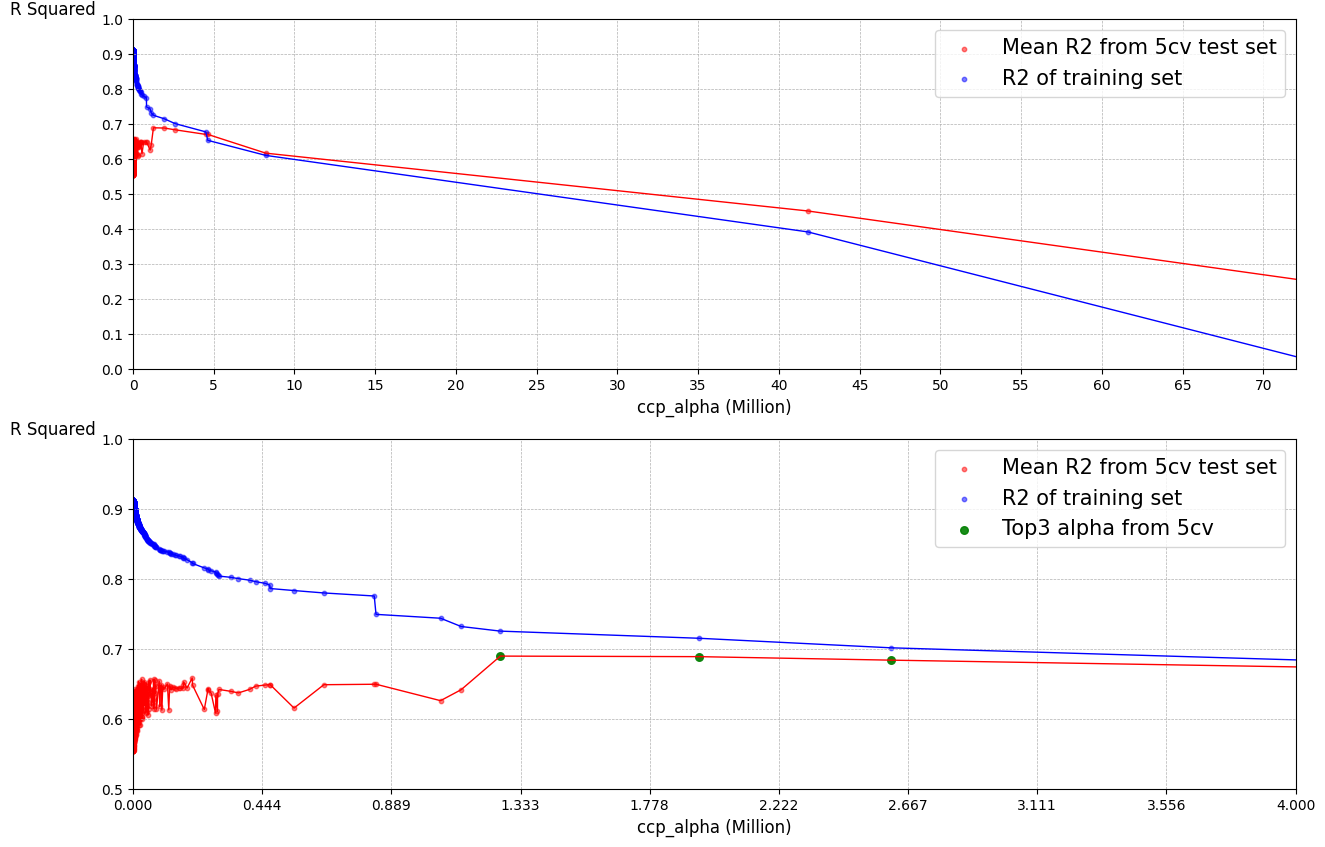

In [23]:
fig = plt.figure(figsize=(15,10))

sub1 = fig.add_subplot(211)
sub1.scatter(ccp_alphas/1000000, ccp_test_r2s, color = 'red', s = 10, alpha = 0.5)  
sub1.scatter(ccp_alphas/1000000, ccp_train_r2s, color = 'blue', s = 10, alpha = 0.5)  
sub1.plot(ccp_alphas/1000000, ccp_test_r2s, color='red', linewidth=1)
sub1.plot(ccp_alphas/1000000, ccp_train_r2s, color='blue', linewidth=1)
sub1.grid(linestyle='--', linewidth=0.5)
sub1.set_xlabel("ccp_alpha (Million)",fontsize=12,rotation=0)
sub1.set_ylabel("R Squared",fontsize=12, rotation=0, loc = 'top')
sub1.set_ylim([0,1])
sub1.set_xlim([0, 72])
sub1.set_xticks(np.linspace(0,70,15))
sub1.set_yticks(np.linspace(0,1,11))
sub1.legend(['Mean R2 from 5cv test set', 'R2 of training set'], fontsize = 15)


sub2 = fig.add_subplot(212)
sub2.scatter(ccp_alphas/1000000, ccp_test_r2s, color = 'red', s = 10, alpha = 0.5)  
sub2.scatter(ccp_alphas/1000000, ccp_train_r2s, color = 'blue', s = 10, alpha = 0.5)  
for i in top_3_r2:
    sub2.scatter(i[0]/1000000, i[1], color = 'green', s = 30, alpha = 0.9) 
sub2.plot(ccp_alphas/1000000, ccp_test_r2s, color='red', linewidth=1)
sub2.plot(ccp_alphas/1000000, ccp_train_r2s, color='blue', linewidth=1)
sub2.grid(linestyle='--', linewidth=0.5)
sub2.set_xlabel("ccp_alpha (Million)",fontsize=12,rotation=0)
sub2.set_ylabel("R Squared",fontsize=12, rotation=0, loc = 'top')
sub2.set_ylim([0.5,1])
sub2.set_xlim([0, 4])
sub2.set_xticks(np.linspace(0,4,10))
sub2.set_yticks(np.linspace(0.5,1,6))
sub2.legend(['Mean R2 from 5cv test set', 'R2 of training set', 'Top3 alpha from 5cv'], fontsize = 15)

plt.show()

In [24]:
dtr = DecisionTreeRegressor(random_state = 100
                            , criterion = 'squared_error'
                            , min_samples_leaf = 5
                            , ccp_alpha = top_3_r2[0][0]).fit(X_train, y_train)

pred_y_train = dtr.predict(X_train)
pred_y_test = dtr.predict(X_test)
print('training R squared :', dtr.score(X_train, y_train))
print('testing R squared :', dtr.score(X_test, y_test))

training R squared : 0.7092267108225283
testing R squared : 0.7184548477363382


In [25]:
np.unique(pred_y_test)

array([  7733.96842105,  10819.16602317,  21231.93162393,  27314.22817955,
        36173.1       ,  56083.16666667,  69166.44444444, 121250.        ])

In [26]:
np.unique(pred_y_train)

array([  7733.96842105,  10819.16602317,  21231.93162393,  27314.22817955,
        36173.1       ,  56083.16666667,  69166.44444444, 121250.        ])

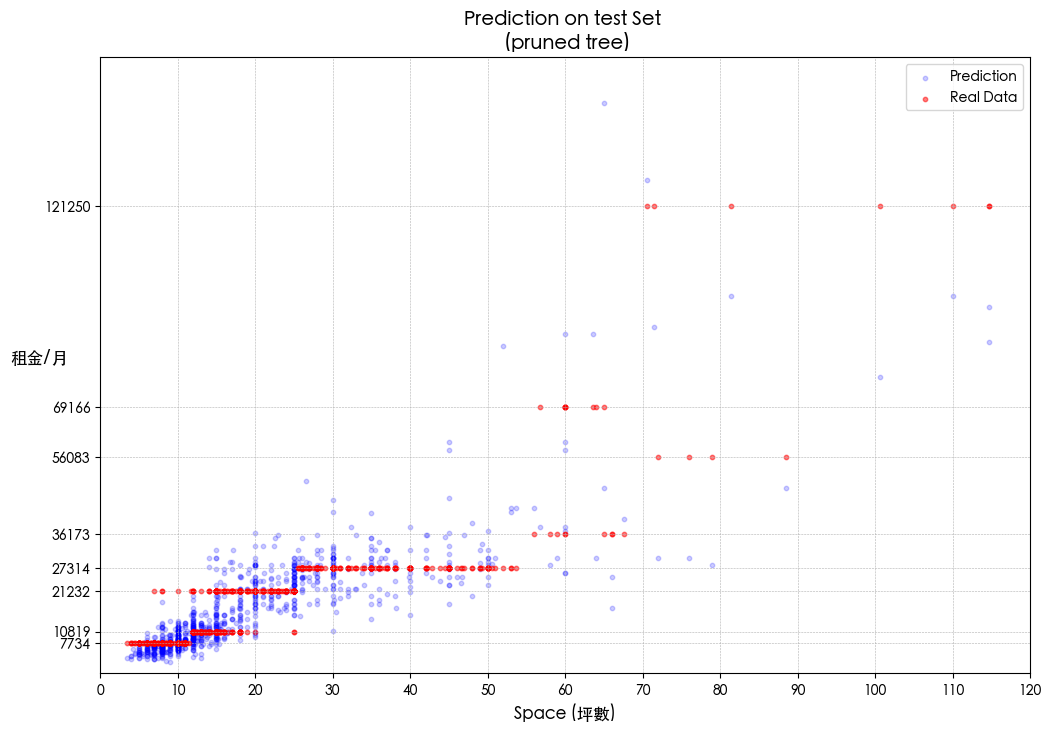

In [27]:
# test set (space and price)

plt.rcParams['font.family'] = ['Heiti TC']

fig2 = plt.figure(figsize=(12,8))

ax = fig2.add_subplot(111)
ax.scatter(X_test['space'], y_test, color = 'blue', s = 10, alpha = 0.2)  
ax.scatter(X_test['space'], pred_y_test, color = 'red', s = 10, alpha = 0.5)  

ax.set_ylim([0,160000])
ax.set_xlim([0, 120])
ax.set_yticks(np.unique(pred_y_test))
ax.set_xticks(np.linspace(0,120,13))
ax.grid(linestyle='--', linewidth=0.4)

ax.set_xlabel("Space (坪數)",fontsize=12,rotation=0)
ax.set_ylabel("租金/月",fontsize=12, rotation=0, loc = 'center')
ax.set_title('Prediction on test Set \n (pruned tree)', fontsize=14)
ax.legend(['Prediction', 'Real Data'], fontsize = 10)

plt.show()

In [28]:
text_representation = tree.export_text(dtr, feature_names = X.columns.tolist())
print(text_representation)

|--- kind_whole_floor <= 0.50
|   |--- space <= 11.95
|   |   |--- value: [7733.97]
|   |--- space >  11.95
|   |   |--- value: [10819.17]
|--- kind_whole_floor >  0.50
|   |--- space <= 70.15
|   |   |--- space <= 25.05
|   |   |   |--- value: [21231.93]
|   |   |--- space >  25.05
|   |   |   |--- space <= 55.30
|   |   |   |   |--- value: [27314.23]
|   |   |   |--- space >  55.30
|   |   |   |   |--- floor <= 11.50
|   |   |   |   |   |--- value: [36173.10]
|   |   |   |   |--- floor >  11.50
|   |   |   |   |   |--- value: [69166.44]
|   |--- space >  70.15
|   |   |--- area_freq <= 0.19
|   |   |   |--- value: [56083.17]
|   |   |--- area_freq >  0.19
|   |   |   |--- value: [121250.00]



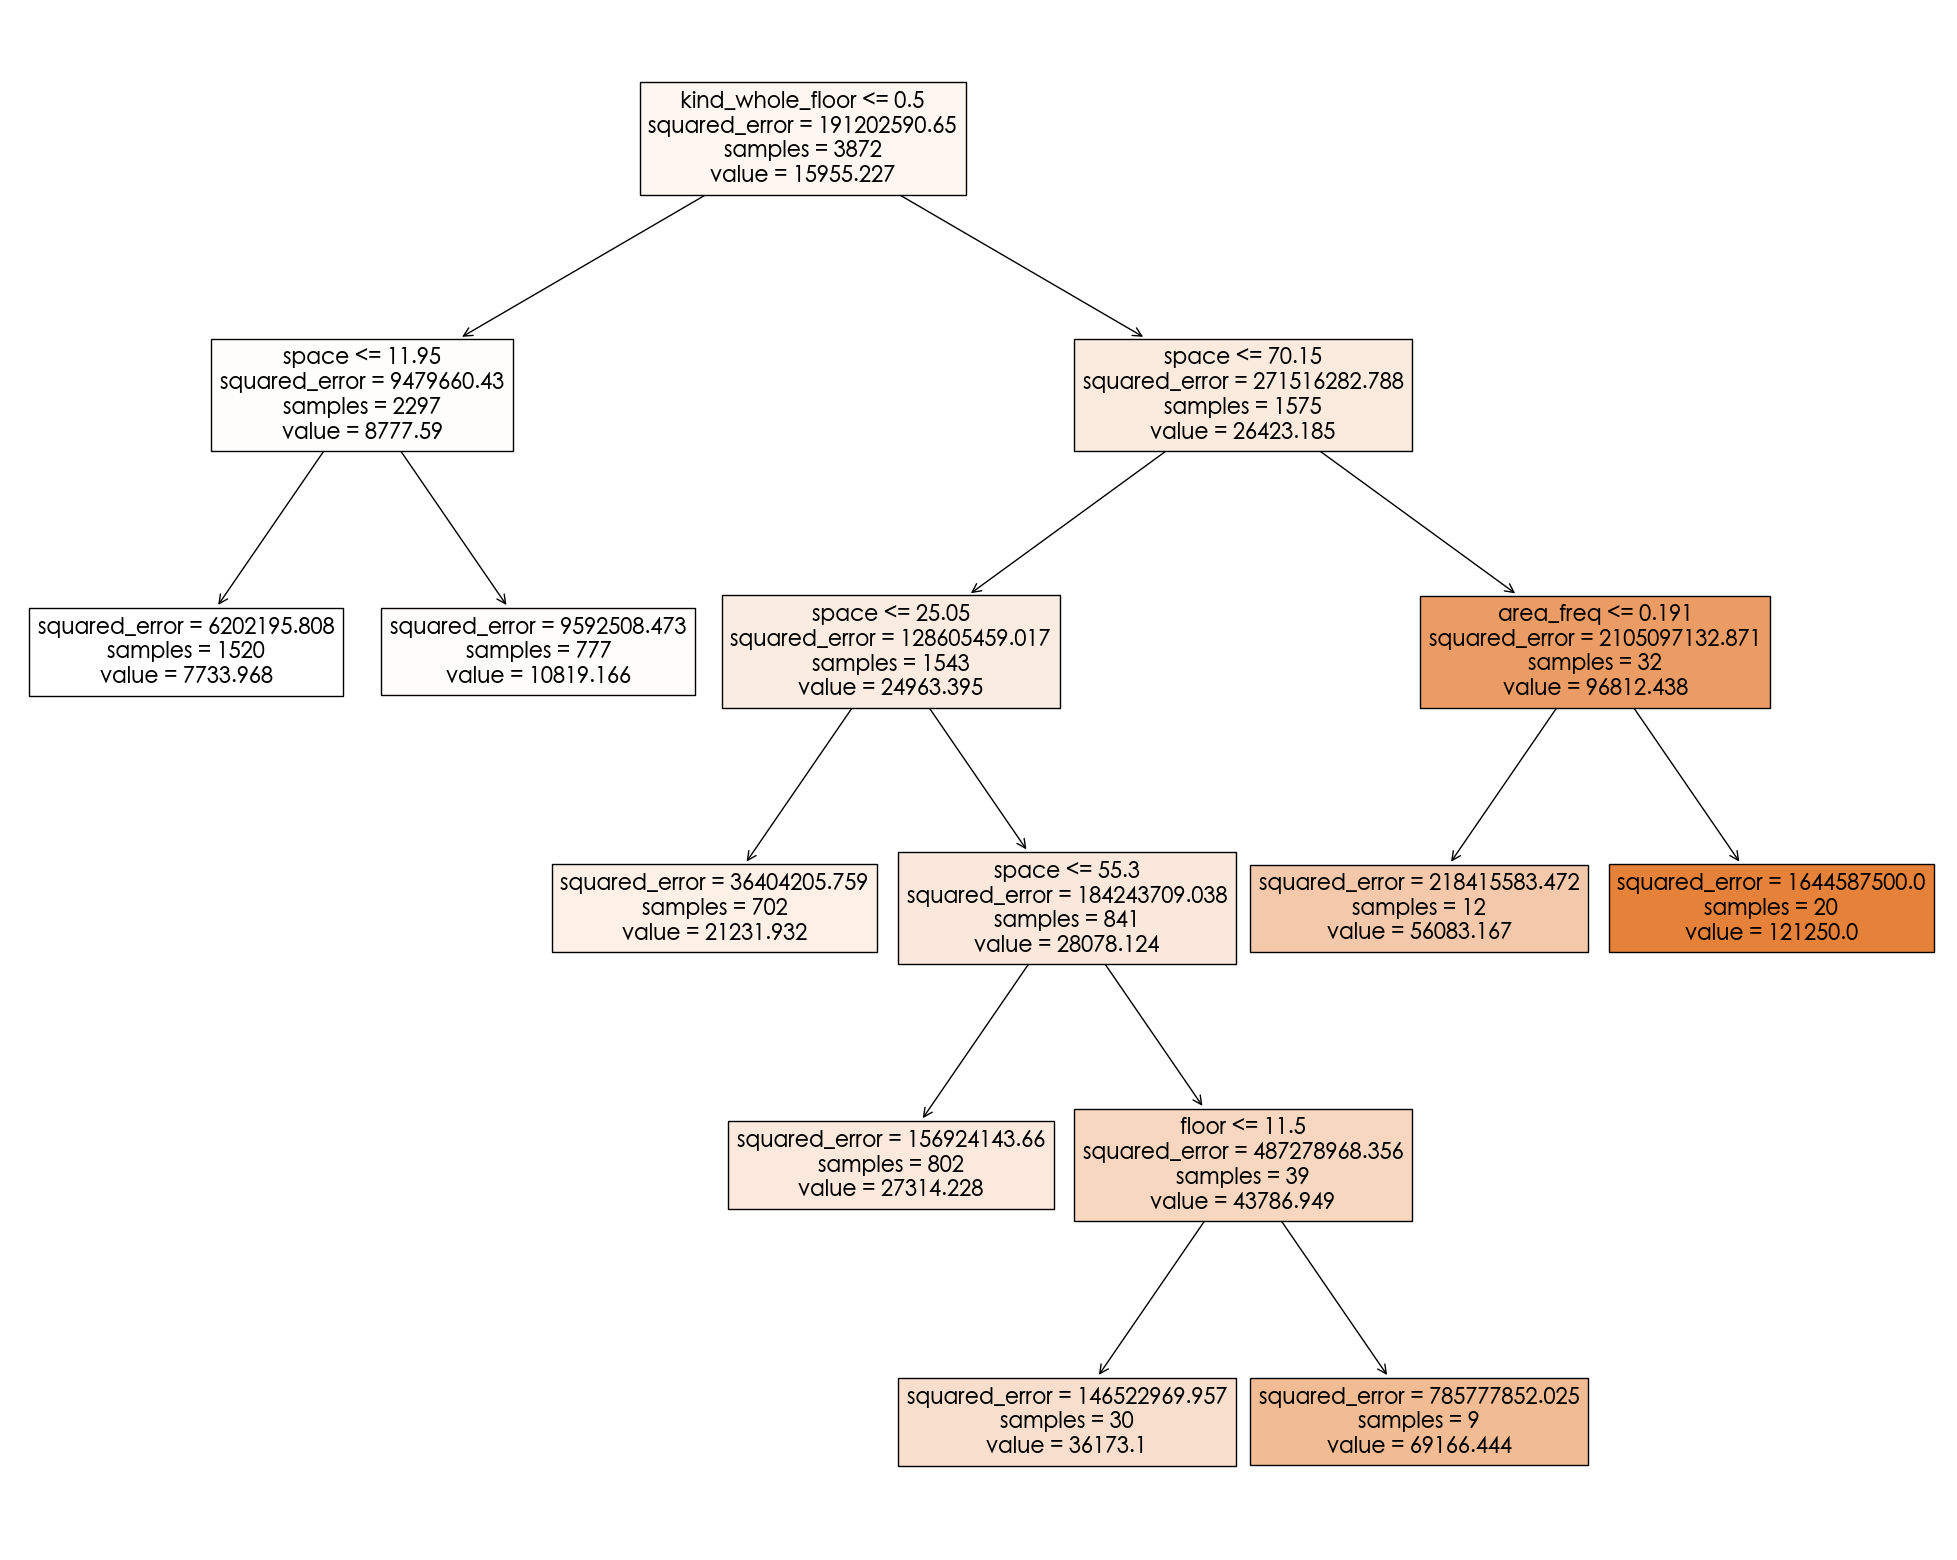

In [29]:
fig3 = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtr, 
                   feature_names=X.columns, 
                   filled=True)

## Bulid decision tree (split with MAE)


### GridSearch CV to bulid tree
The reason I decide to use GridSearchCV to bulid model is that collocation of 'CCP pruning' and 'MAE spliter' cost too much time.

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
dtr = DecisionTreeRegressor(random_state = 100, criterion = 'absolute_error')
para = {"max_depth":[*range(2,10)]
        ,'splitter' :['random', 'best']
        , 'min_samples_split':[*range(40,320,50)]
        ,'min_samples_leaf':[*range(20,160,25)]
        }
GS = GridSearchCV(dtr, para, cv=5, scoring = 'neg_mean_absolute_error', n_jobs = 4)

In [32]:
start = time.time()
GS.fit(X,y)
end = time.time()
print('The calculation cost: ',end - start, 'sec')

The calculation cost:  179.51264786720276 sec


In [33]:
GS.best_params_

{'max_depth': 9,
 'min_samples_leaf': 20,
 'min_samples_split': 90,
 'splitter': 'best'}

In [34]:
GS.best_estimator_

DecisionTreeRegressor(criterion='absolute_error', max_depth=9,
                      min_samples_leaf=20, min_samples_split=90,
                      random_state=100)

In [35]:
pred_y_train = GS.best_estimator_.predict(X_train)
pred_y_test = GS.best_estimator_.predict(X_test)

In [36]:
from sklearn.metrics import mean_absolute_error
print('training set MAE :',mean_absolute_error(y_true = y_train, y_pred = pred_y_train))
print('testing set MAE :', mean_absolute_error(y_true = y_test, y_pred = pred_y_test))

print('training R squared :', GS.best_estimator_.score(X_train, y_train))
print('testing R squared :', GS.best_estimator_.score(X_test, y_test))

training set MAE : 3010.69486053719
testing set MAE : 3193.0975232198143
training R squared : 0.6830424922902142
testing R squared : 0.7042396080566491


In [37]:
np.unique(pred_y_train)

array([ 5000. ,  5500. ,  5800. ,  6000. ,  6500. ,  6700. ,  6800. ,
        7000. ,  7099. ,  7200. ,  7300. ,  7474.5,  7500. ,  7999. ,
        8000. ,  8150. ,  8499. ,  8499.5,  8500. ,  8650. ,  8749.5,
        8800. ,  8999.5,  9000. ,  9500. ,  9799.5, 10500. , 10693. ,
       10799. , 10999. , 11000. , 11500. , 11999.5, 12000. , 12800. ,
       13000. , 14000. , 15250. , 16499. , 16999. , 17999. , 18000. ,
       20000. , 20999. , 21000. , 21999.5, 22999. , 23000. , 24000. ,
       24500. , 25000. , 25499.5, 26000. , 26999. , 27000. , 27500. ,
       29999. , 30000. , 35000. , 38000. , 92500. ])

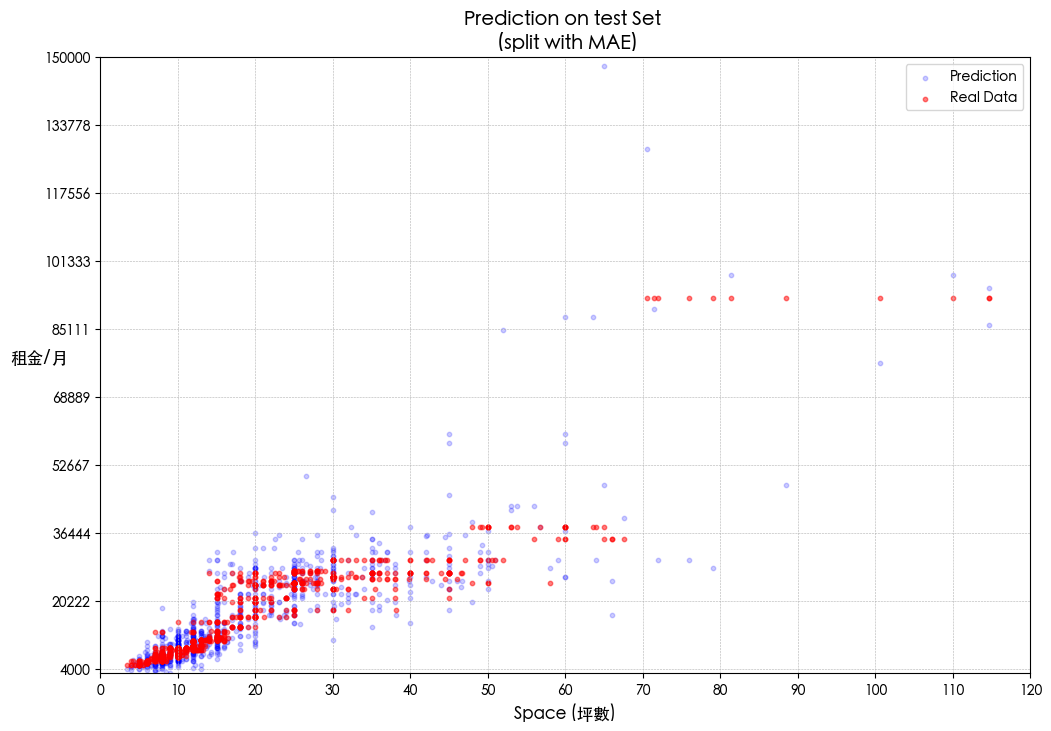

In [38]:
# test set (space and price)

plt.rcParams['font.family'] = ['Heiti TC']

fig2 = plt.figure(figsize=(12,8))

ax = fig2.add_subplot(111)
ax.scatter(X_test['space'], y_test, color = 'blue', s = 10, alpha = 0.2)  
ax.scatter(X_test['space'], pred_y_test, color = 'red', s = 10, alpha = 0.5)  
ax.set_ylim([3000,150000])
ax.set_xlim([0, 120])
ax.set_yticks(np.linspace(4000,150000,10))
ax.set_xticks(np.linspace(0,120,13))
ax.grid(linestyle='--', linewidth=0.4)

ax.set_xlabel("Space (坪數)",fontsize=12,rotation=0)
ax.set_ylabel("租金/月",fontsize=12, rotation=0, loc = 'center')
ax.set_title('Prediction on test Set \n (split with MAE)', fontsize=14)
ax.legend(['Prediction', 'Real Data'], fontsize = 10)

plt.show()

### Visualize best model from GridSearch CV

In [39]:
# text_representation = tree.export_text(GS.best_estimator_, feature_names = X.columns.tolist())
# print(text_representation)

In [40]:
import graphviz
from sklearn import tree

In [41]:
dot_data = tree.export_graphviz(GS.best_estimator_
                                ,feature_names= X_train.columns
                                ,filled=True
                                ,rounded=True
                                ,rotate = True
                                # , leaves_parallel = True
                                )


graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render('tree',view=True)

'tree.png'

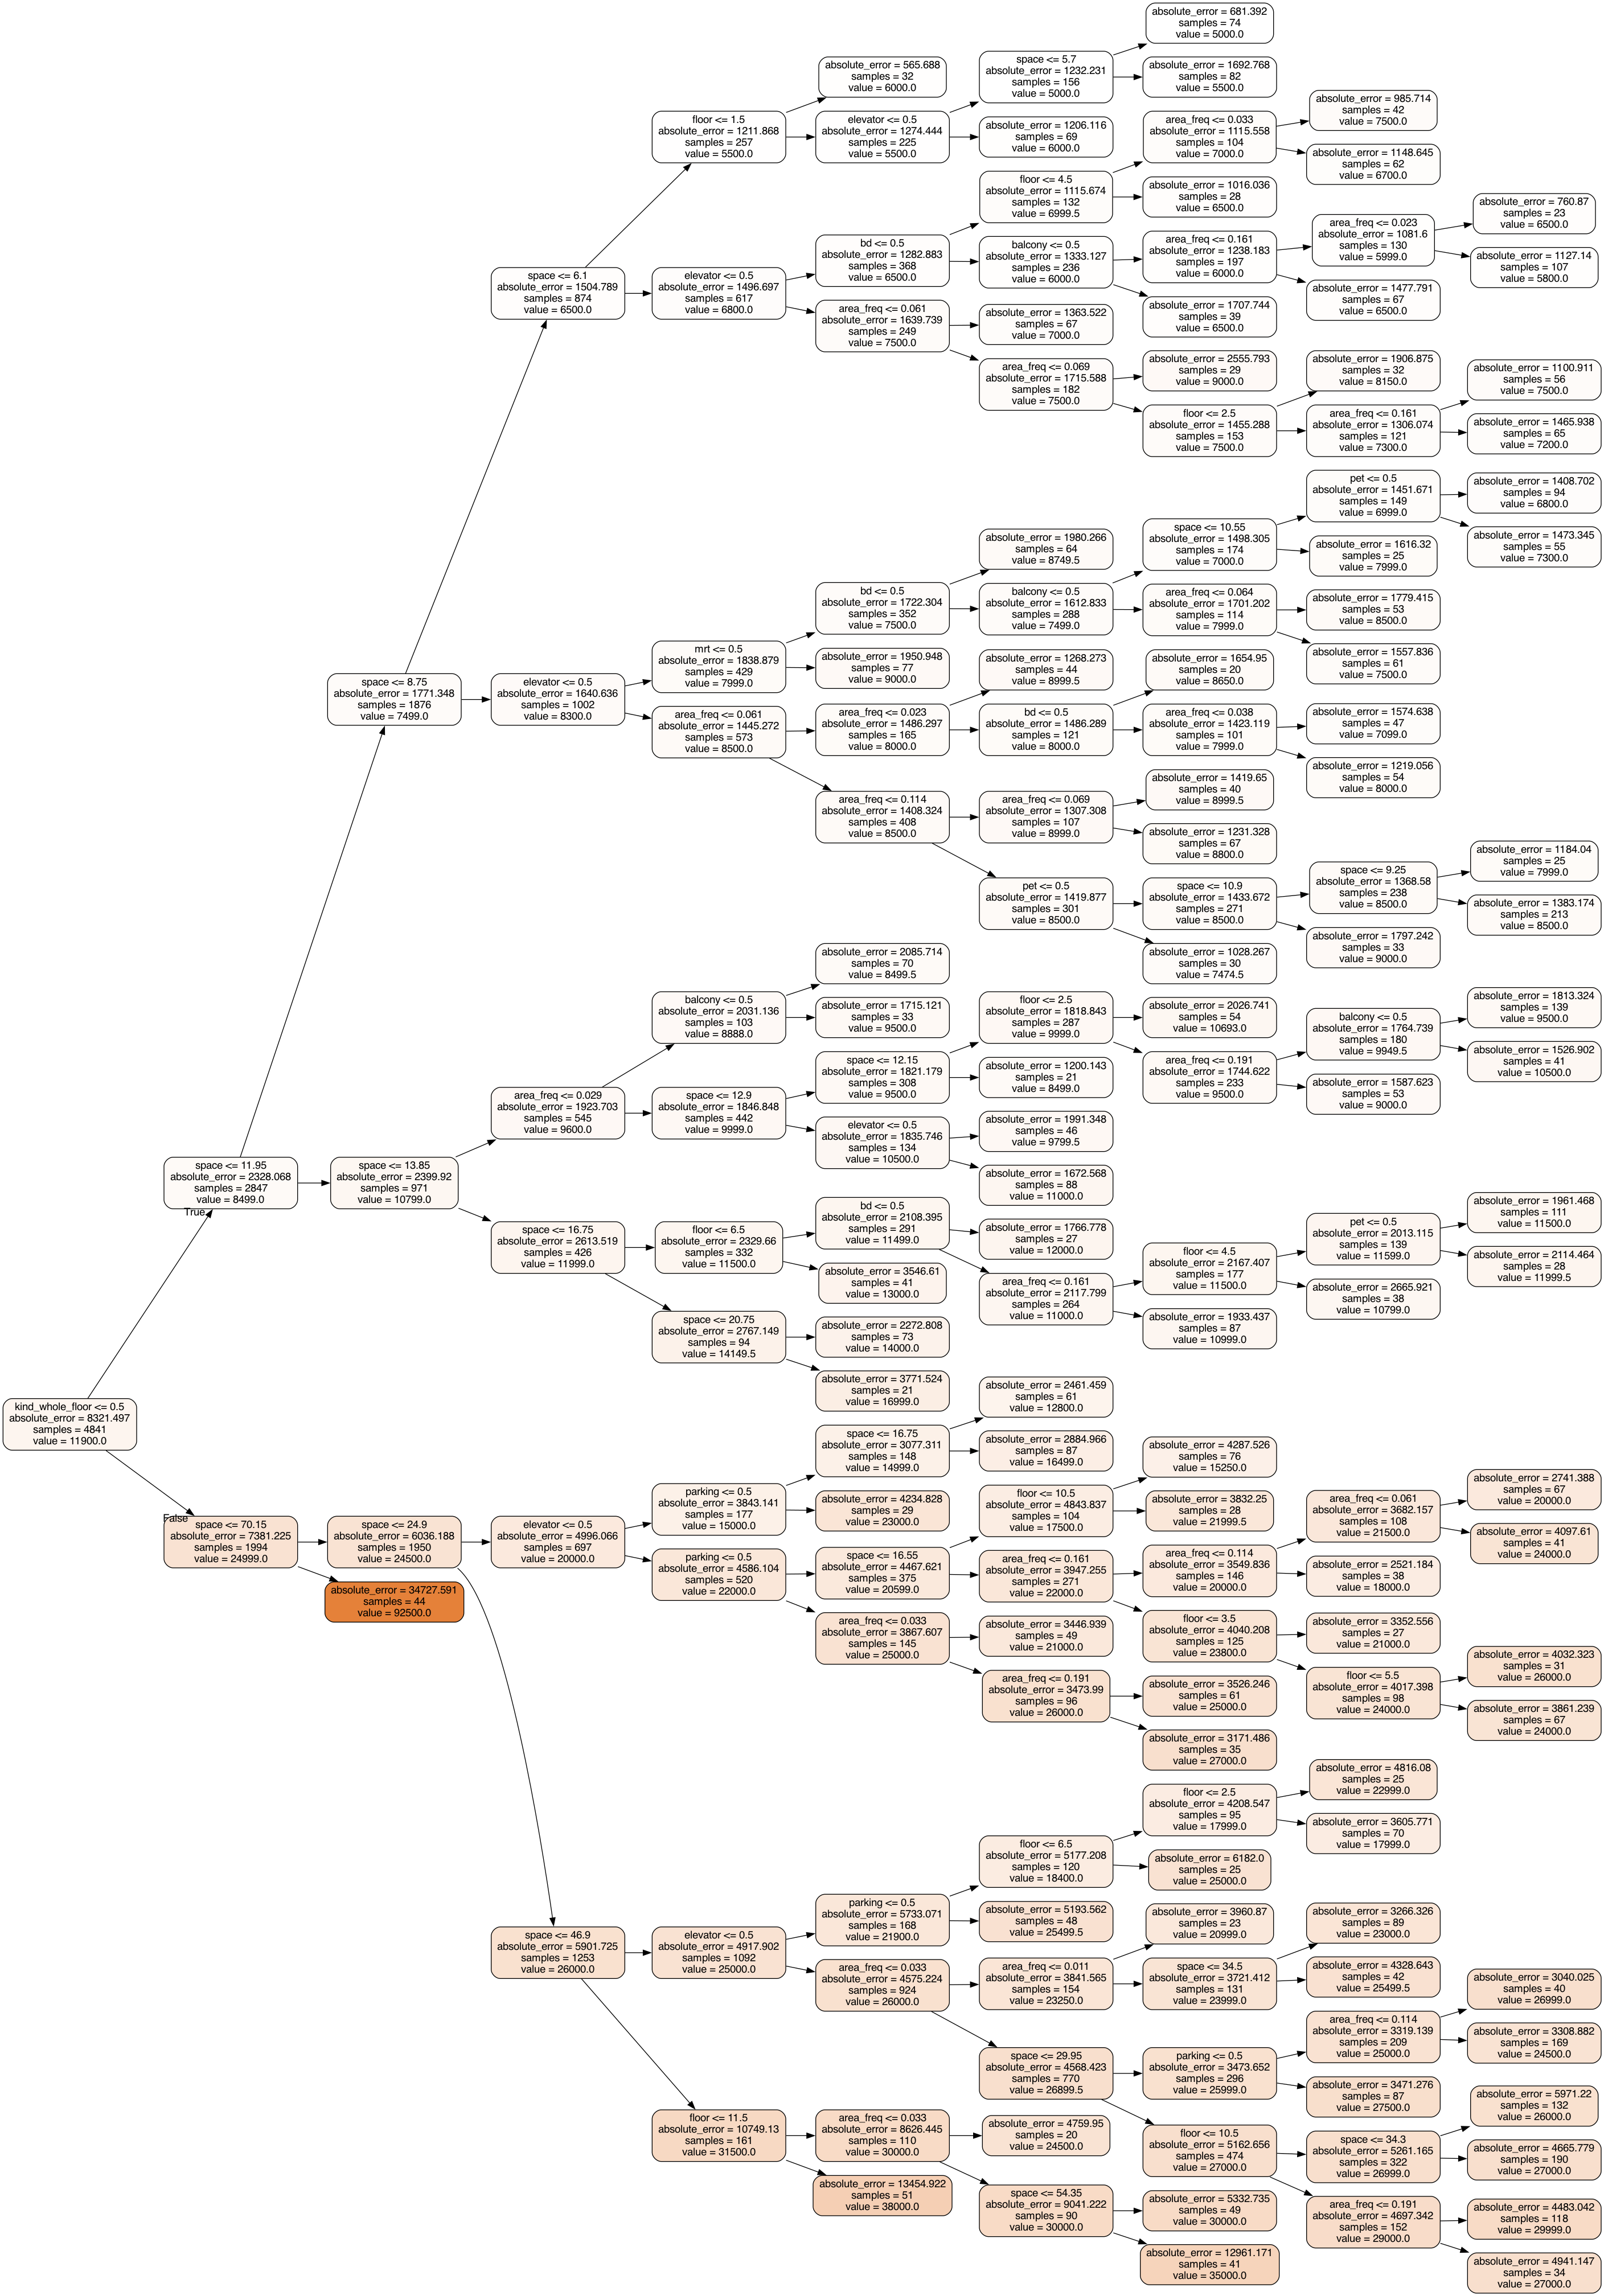

In [42]:
from IPython.display import Image
Image(filename=('./tree.png'),width=1500)

# Random Forest Regression

# GBDT